In [1]:
import os
os.getcwd()

'/home/hermuba/resistanceExp/EcoliGenomes/code/exp2_cdhit'

In [2]:
# reading cdhit results `.clstr`

# parse `.clstr`

def parseCluster(filename):
    
    # read filename.clstr
    f = open('../../cdhitResult/'+filename+'.clstr')
    lines = f.readlines()
    f.close()
    
    # count store in list
    clusterName = []
    clusterCount = []

    # parse it
    i = 0 # line index
    for line in lines:
        
        if line[0] == '>':
            #print(line.rstrip()[1:]) # Cluster 0
            clusterName.append(line.rstrip()[1:])
            if i > 0:
                #print(int(lines[i-1].split('\t')[0]) + 1) # last cluster's last entry +1 = how many genes
                clusterCount.append(int(lines[i-1].split('\t')[0]) + 1)
        if i == len(lines)-1:
            clusterCount.append(int(lines[i].split('\t')[0]) + 1)
            #print(len(line))
        i = i+ 1
    return(clusterName, clusterCount)
    

In [3]:
# test 
name , count = parseCluster('95cdhit')
print(len(name),len(count))
print(count)

13561 13561
[7, 2, 1, 8, 3, 11, 5, 2, 43, 1, 23, 16, 16, 6, 3, 5, 49, 4, 5, 1, 2, 3, 16, 1, 1, 45, 2, 1, 1, 1, 11, 2, 32, 34, 5, 1, 1, 13, 4, 14, 1, 1, 1, 3, 1, 50, 2, 1, 1, 9, 1, 14, 5, 2, 14, 4, 6, 3, 2, 2, 2, 29, 64, 2, 13, 35, 6, 4, 32, 1, 3, 1, 50, 6, 1, 1, 3, 4, 3, 50, 3, 4, 3, 16, 1, 13, 4, 1, 2, 14, 5, 5, 19, 3, 20, 2, 24, 1, 50, 1, 2, 1, 2, 2, 9, 19, 1, 3, 6, 20, 2, 4, 4, 3, 5, 2, 1, 23, 5, 1, 50, 14, 50, 5, 1, 50, 2, 13, 18, 1, 50, 18, 50, 3, 1, 16, 1, 2, 1, 12, 1, 50, 16, 1, 1, 3, 1, 9, 3, 16, 5, 50, 4, 6, 1, 35, 16, 1, 6, 10, 1, 50, 50, 26, 9, 50, 2, 5, 20, 2, 4, 21, 6, 3, 1, 1, 2, 2, 50, 8, 1, 5, 1, 1, 50, 6, 7, 22, 51, 50, 6, 4, 18, 1, 12, 50, 21, 53, 51, 19, 1, 2, 2, 1, 3, 4, 8, 3, 1, 3, 22, 1, 1, 50, 1, 50, 1, 2, 13, 50, 1, 52, 17, 15, 51, 1, 18, 18, 13, 2, 6, 1, 2, 1, 1, 50, 3, 13, 50, 50, 13, 50, 3, 50, 1, 50, 21, 22, 3, 9, 51, 50, 41, 2, 50, 1, 49, 15, 1, 50, 2, 50, 12, 1, 3, 50, 2, 2, 2, 27, 50, 6, 5, 2, 1, 1, 2, 24, 4, 2, 15, 27, 23, 2, 1, 3, 1, 52, 1, 1, 21, 1, 29

# printing count of each cluster
y axis: count
x axis: cluster "1"

<Container object of 13561 artists>

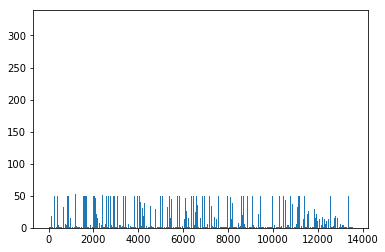

In [4]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(count)),count)

# plotting how many genes in a cluster
- x axis: cluster with 50 genes
- y axis: how many clusters

## why are there clusters with > 50 genes?
because there are some genes with >1 copy. so if a cluster has 50 gene, this does **not** gaurentee a core genome.

(array([  6.29700000e+03,   7.53000000e+02,   2.53000000e+02,
          5.93000000e+02,   8.77000000e+02,   3.09000000e+02,
          3.14000000e+02,   1.35000000e+02,   1.83000000e+02,
          1.23000000e+02,   7.40000000e+01,   1.15000000e+02,
          1.03000000e+02,   1.11000000e+02,   3.03000000e+02,
          2.94700000e+03,   1.00000000e+01,   9.00000000e+00,
          8.00000000e+00,   1.40000000e+01,   4.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
        

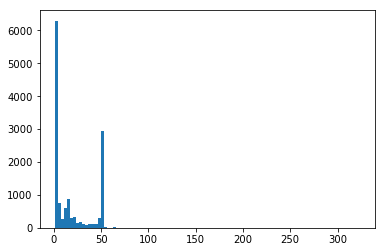

In [5]:
plt.hist(count, bins = 100)

# absence presence pattern
only absence/presense pattern can tell us which gene is in the core genome

In [6]:
# generating /prescence data
from pandas import DataFrame
df = DataFrame(columns = name)
df

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,...,Cluster 13551,Cluster 13552,Cluster 13553,Cluster 13554,Cluster 13555,Cluster 13556,Cluster 13557,Cluster 13558,Cluster 13559,Cluster 13560


In [7]:
# prescence, abscence data
filename = '95cdhit'
f = open('../../cdhitResult/'+filename+'.clstr')
lines = f.readlines()
f.close()

for line in lines:
        
        if line[0] == '>':
            #print(line.rstrip()[1:]) # Cluster 0
            columnName = line.rstrip()[1:]
        else:
            ID = line.split('|')[1].split('...')[0]
            df.loc[ID, columnName] = True
df.head()
            

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,...,Cluster 13551,Cluster 13552,Cluster 13553,Cluster 13554,Cluster 13555,Cluster 13556,Cluster 13557,Cluster 13558,Cluster 13559,Cluster 13560
1438681.3,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1328432.3,True,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
1328434.3,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1438688.3,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
1438693.3,True,True,NaN,True,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.fillna(False)

In [9]:
countOfCore = df.sum(axis = 0)
countOfGenome = df.sum(axis = 1)

In [10]:
len([x for x in list(countOfCore) if x == 50]) # core genome size = 2944

2944

In [12]:
countOfGenome
# each genome has 4500-5000 genes, with 2944 core genome and about 1500-2000 accessory genes

1438681.3    4773
1328432.3    4625
1328434.3    4827
1438688.3    4882
1438693.3    4556
1438694.3    4632
1438695.3    4930
1400157.3    4936
1438675.3    4898
1445862.3    5113
1328440.3    5029
1328441.3    5062
1328442.3    5061
1328443.3    5025
1328444.3    5059
1328445.3    5066
1328436.3    5063
1328437.3    5061
1400156.3    4945
1328438.3    5062
1328439.3    5040
1445863.3    4720
1438685.3    4929
1438673.3    4707
1328446.3    4991
1328447.3    4990
1328449.3    4833
1400158.3    4658
1438668.3    5040
1438670.3    5043
1438671.3    4695
1438672.3    4995
1438674.3    4771
1438676.3    4678
1438677.3    4692
1438679.3    4699
1438680.3    4653
1438682.3    4771
1438683.3    4786
1328433.3    5072
1438684.3    4883
1438689.3    4966
1438691.3    4552
1438696.3    4829
1438678.3    4611
1438687.3    4682
1328448.3    4276
1328450.3    4419
1438669.3    4321
1438686.3    4727
dtype: int64

In [13]:
df.to_excel('../../cdhitResult/cdhitPattern.xlsx')
# save to excel and then plot with R